주성분 분석(PCA)을 사용한 비지도 데이터 압축.   
지도 방식의 차원축소 기법인 선형 판별 분석(LDA)을 이용하여 클래스 구별 능력 최대화하기    
커널PCA를 사용한 비선형 차원 축소하기

특성 선택과 특성 추출은 원본특성을 유지하느냐에 있음.   
특성선택 알고리즘은 원본 특성을 유지함.   
특성 추출은 새로운 특성 공간으로 데이터를 변환 하거나 투영함

In [1]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                     'ml/machine-learning-databases/'
                     'wine/wine.data', header=None)

In [2]:
from sklearn.model_selection import train_test_split

#X : 컬럼인덱스 1~13
#y : 컬럼인덱스 0
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

#train_test_split 함수를 사용하여 랜덤하게 test, train세트나눠줌
#test_size = 0.3으로 test세트의 비율이 30%가 됨
#stratify = y 로 test,train의 클래스 비율이 원본의 비율과 같게 됨
X_train, X_test, y_train, y_test=\
train_test_split(X,y, test_size=0.3,random_state=0, stratify=y)

#표준화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, test_idx = None,
                         resolution=0.02):
    
    #마커와 컬러맵을 설정
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정경계
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha =0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y ==cl, 0], y=X[y ==cl, 1],
                   alpha =0.6, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')

### PCA

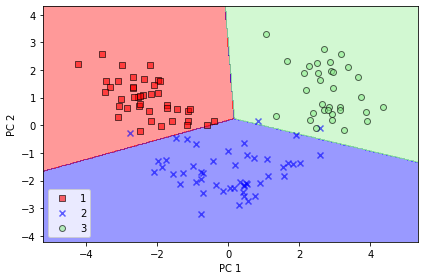

In [4]:
#사이킷런의 주성분 분석
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

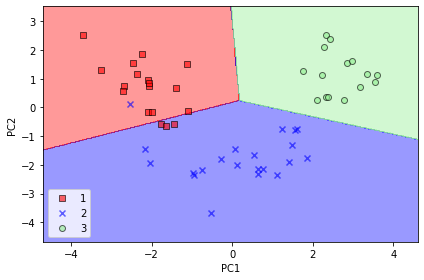

In [5]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [6]:
pca = PCA(n_components =None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

### LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

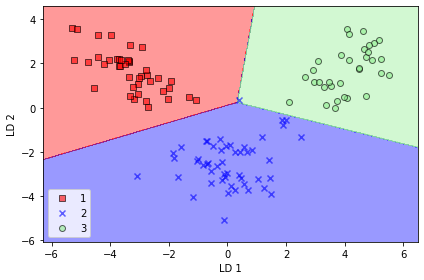

In [8]:
lr = LogisticRegression(solver ='liblinear',multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

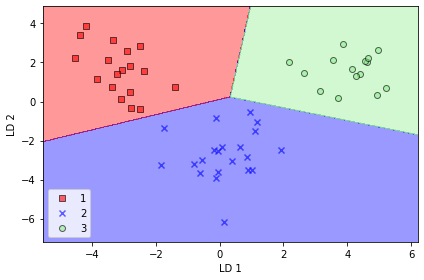

In [9]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

### PCA


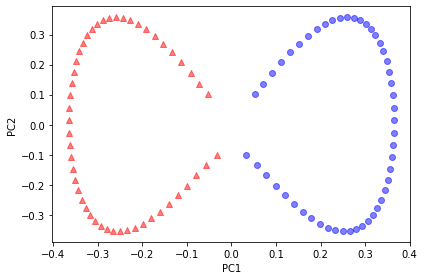

In [14]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples =100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                       kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0,0], X_skernpca[y==0,1],
           color='red', marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0], X_skernpca[y==1,1],
           color='blue', marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()